Shape: (3000, 27)
Columns: ['date', 'continent', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence']


date      continent location  total_cases  new_cases  total_deaths  \
0  2021-11-19           Asia    India      6423388       2490        107051   
1  2021-09-12  North America   Russia      6550634       6980        481184   
2  2020-04-20         Europe   Canada      4304572       9134         15116   
3  2022-10-16           Asia  Germany      2234489       7661         20045   
4  2021-05-15         Europe      USA      9958614       1724        419543   

   new_deaths  total_tests  new_tests  positive_rate  ...  stringency_index  \
0         323     60016385       7386       0.904377  ...         69.259331   
1         697     28666409       6862       0.525850  ...          7.185287   
2         325     80352550      40108       0.791575  ...         14.823246   
3         624     89212990      91788       0.115291  ...         70.007502   
4         824      5364240      75023       0.927643  ...         28.972334   

   population  population_density  median_age  aged_65_older  aged_70_older  \
0  1241418161           67.394702   49.883751       8.649395      16.052063   
1   114516392          694.409929   30.126823       8.957854       4.423022   
2  1152898402          784.464729   22.648063       9.336778      18.776372   
3  1342525124          403.467508   42.951109       5.321894      10.526520   
4   744943966          182.869692   26.414731      19.321761      15.889173   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  
0    44313.199955        20.827286             177.832655            16.296474  
1     8196.945011        20.478579             470.991420             8.579170  
2    52607.000057        11.924664             415.880908            14.989789  
3    23297.985037         4.591400             643.510444            18.084096  
4    56126.828895         5.431330             451.846790             5.971409  

[5 rows x 27 columns]

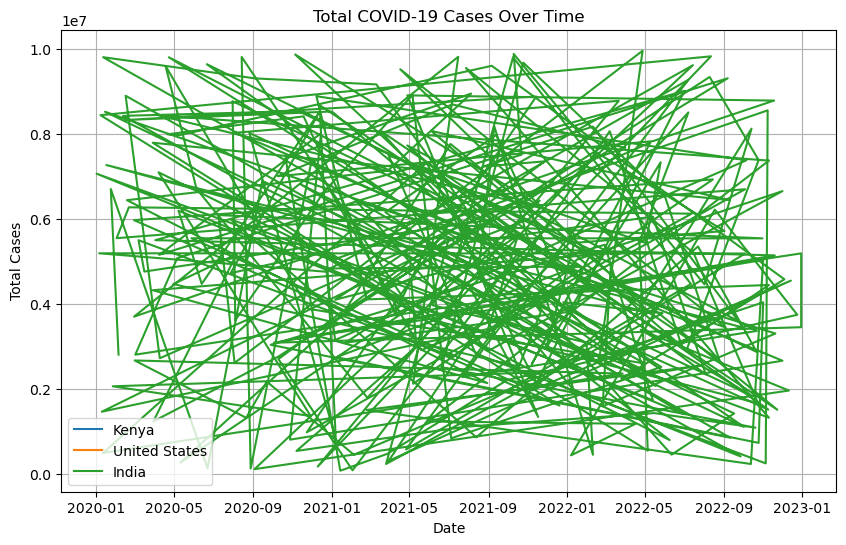

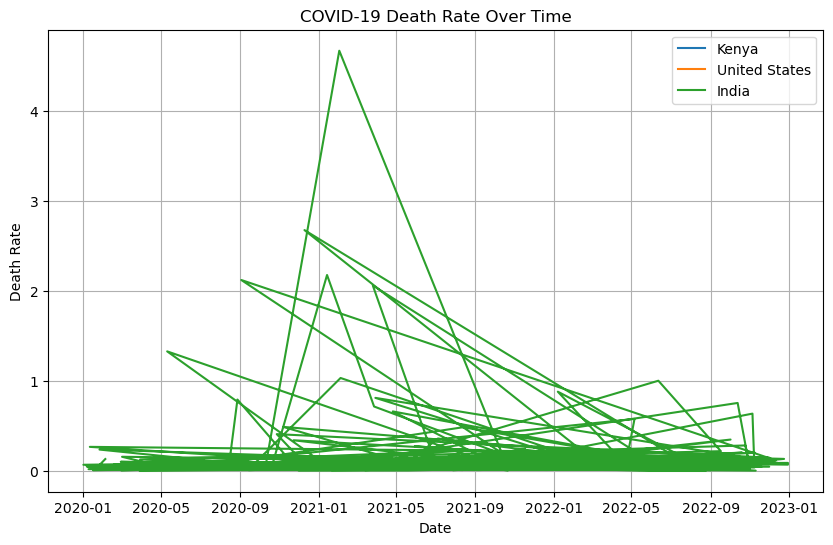

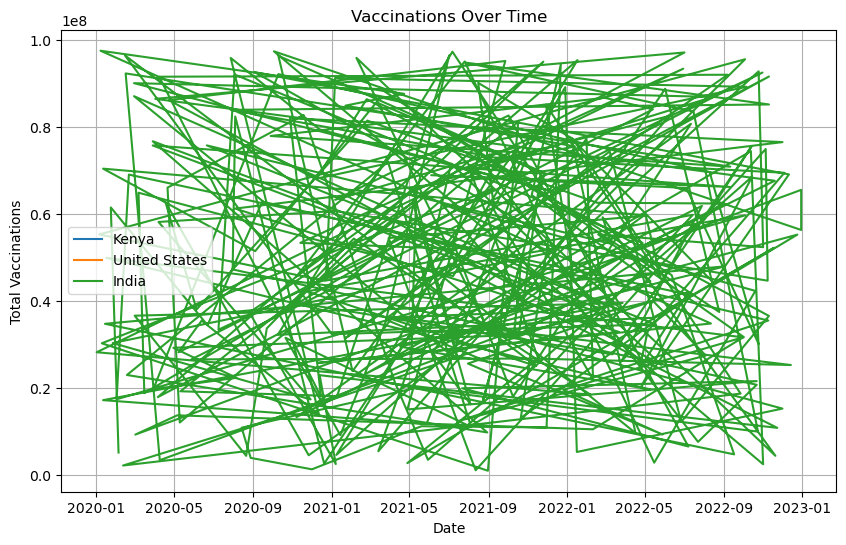

C:\Users\user\AppData\Local\Temp\ipykernel_6080\4070012855.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top_cases, palette="Reds_r")


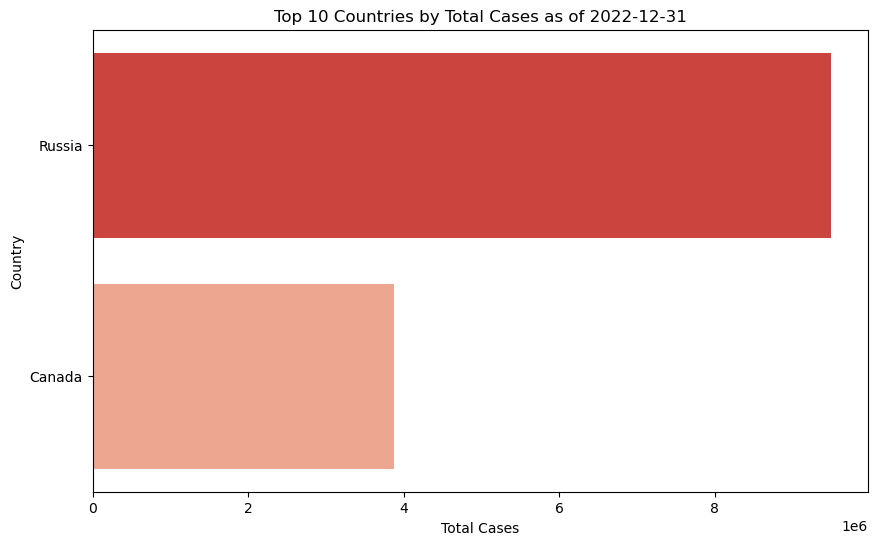

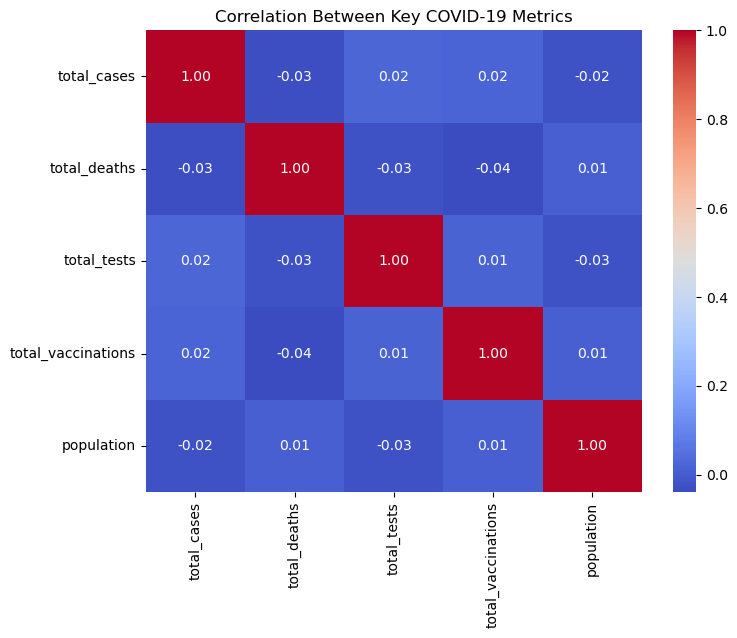

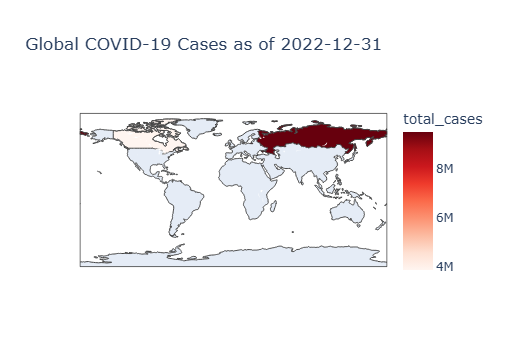

=== Key Insights ===
Data covers up to: 2022-12-31
Top country by total cases: Russia (9,490,536 cases)
Top country by total deaths: Canada


In [1]:
# ---------------------------------
# COVID-19 Global Data Tracker
# Using synthetic_covid19_data.csv
# ---------------------------------

# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2️⃣ Load Dataset
file_path = "synthetic_covid19_data.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Preview dataset
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# 3️⃣ Convert Date & Clean
df['date'] = pd.to_datetime(df['date'])

# Select countries for comparison
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()

# Fill missing numeric values with 0
numeric_cols = df_countries.select_dtypes(include='number').columns
df_countries[numeric_cols] = df_countries[numeric_cols].fillna(0)

# Add death rate column
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

# 4️⃣ Total COVID-19 Cases Over Time
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

# 5️⃣ Death Rate Trends
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.grid(True)
plt.show()

# 6️⃣ Vaccination Progress
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

# 7️⃣ Top 10 Countries by Total Cases
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top_cases = latest_data.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='total_cases', y='location', data=top_cases, palette="Reds_r")
plt.title(f"Top 10 Countries by Total Cases as of {latest_date.date()}")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

# 8️⃣ Correlation Heatmap
corr_cols = ['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'population']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Key COVID-19 Metrics")
plt.show()

# 9️⃣ Optional: Choropleth Map of Total Cases
fig = px.choropleth(latest_data,
                    locations="location",
                    locationmode="country names",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title=f"Global COVID-19 Cases as of {latest_date.date()}")
fig.show()

# 🔟 Auto Insights
print("=== Key Insights ===")
print(f"Data covers up to: {latest_date.date()}")
print(f"Top country by total cases: {top_cases.iloc[0]['location']} ({top_cases.iloc[0]['total_cases']:,} cases)")
print(f"Top country by total deaths: {latest_data.sort_values(by='total_deaths', ascending=False).iloc[0]['location']}")

for country in countries:
    cdata = latest_data[latest_data['location'] == country]
    if not cdata.empty:
        cases = int(cdata['total_cases'].values[0])
        deaths = int(cdata['total_deaths'].values[0])
        vacc = int(cdata['total_vaccinations'].values[0])
        print(f"{country}: {cases:,} cases, {deaths:,} deaths, {vacc:,} vaccinations")
